# Introduction

Takes gasoline prices from "bensanhinta" sheet.

The data is in format:


| update time   | date   | station	  | E95E10 price	  | 98E price	  | Diesel price   |
|:---------:|:---------:|:---------:|:---------:|:---------:|:---------:|
| 21:00:10   | 18.4.2020   | ABC   | 1.332   | 1.422   | 1.222|
| 21:00:10   | 18.4.2020   | Teboil Sakonkatu   | 1.308   | 1.398   | 1.198|

<br>

###Things to take into account while processing the data:

- Polttoaine.net is a service that gets price data from users, that enter the price
- Since the price data relies completely on activity of users, there is most likely days where the price information is not updated. 

###Setup
- Change the name of spreadsheet where the data is stored. In this example, it is "bensanhinta"

###TO-DO
- Support for more stations
- Currently it takes some manual work to change the station, it could (should) be improved so that price data of every station listed in spreadsheet is analyzed
- Not sure what happens if data is invalid, e.g. if data is scraped from wrong elements of the website. Some kind of validation is needed just in case
- Comparison - what station is the least expensive

<br>
In first part, we take the data from worksheet, and save it to "prices_df"

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#Name of the spreadsheet needs to be changed if some other spreadsheet is beign used
worksheet = gc.open('bensanhinta').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
prices_df = pd.DataFrame.from_records(rows)
prices_df

Then, we edit the headers to "update time", "date" etc..

In [ ]:
prices_df = prices_df.rename(columns=prices_df.iloc[0]).drop(prices_df.index[0])





Lets separate stations (or at least one in first phase, ABC in this case)



In [ ]:
#Change this if/when other station needed
station_name = "ABC"


station_df = prices_df[prices_df["station"] == station_name]
station_df['Diesel price'] = pd.to_numeric(station_df['Diesel price'],errors='coerce')
station_df['E95E10 price'] = pd.to_numeric(station_df['E95E10 price'],errors='coerce')
station_df['98E price'] = pd.to_numeric(station_df['98E price'],errors='coerce')




In [ ]:
import datetime

station_df = station_df.drop_duplicates(subset=['date'], keep='last')

d_list = []
ddelta_list = []
price_diff_list = []
for index, row in station_df.iterrows():
    #first day modify
    dsplit = row['date'].split('.')
    day = datetime.date(int(dsplit[2]),int(dsplit[1]),int(dsplit[0]))
    d_list.append(day)
    lenl = len(d_list) 
    if lenl > 1:
      ddelta = d_list[lenl - 1] - d_list[lenl - 2] 
      ddelta_list.append(ddelta.days)
      
    else:
      ddelta_list.append(0)
      price_diff_list.append(0)
    

    
   

station_df['date'] = d_list
station_df['date_diff'] = ddelta_list

station_df

[0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 143, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


,update time,date,station,E95E10 price,98E price,Diesel price,date_diff
1,21:00:10,2020-04-18,ABC,1.332,1.422,1.222,0
11,21:00:06,2020-04-19,ABC,1.332,1.422,1.222,1
21,21:00:07,2020-04-20,ABC,1.332,1.422,1.222,1
31,21:00:04,2020-04-21,ABC,1.327,1.417,1.217,1
51,21:00:05,2020-04-22,ABC,1.313,1.403,1.211,1
...,...,...,...,...,...,...,...
2148,21:00:09,2021-04-21,ABC,1.699,1.789,1.549,1
2158,21:00:05,2021-04-22,ABC,1.693,1.783,1.543,1
2168,21:00:04,2021-04-23,ABC,1.595,1.685,1.495,1
2178,21:00:05,2021-04-24,ABC,1.555,1.645,1.488,1


Date now edited to datetime. Next lext add price. In this case, only Diesel price is analyzed





In [ ]:


station_df['Diesel_diff'] = station_df['Diesel price'] - station_df.shift(1)['Diesel price']



In [ ]:
station_df_singleday = station_df.loc[station_df['date_diff'] == 1]

station_df_singleday['Weekday'] = station_df_singleday['date']
station_df_singleday['Weekday'] = station_df_singleday['Weekday'].apply(lambda x: x.weekday())

station_df_singleday



Then lets visualize!

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


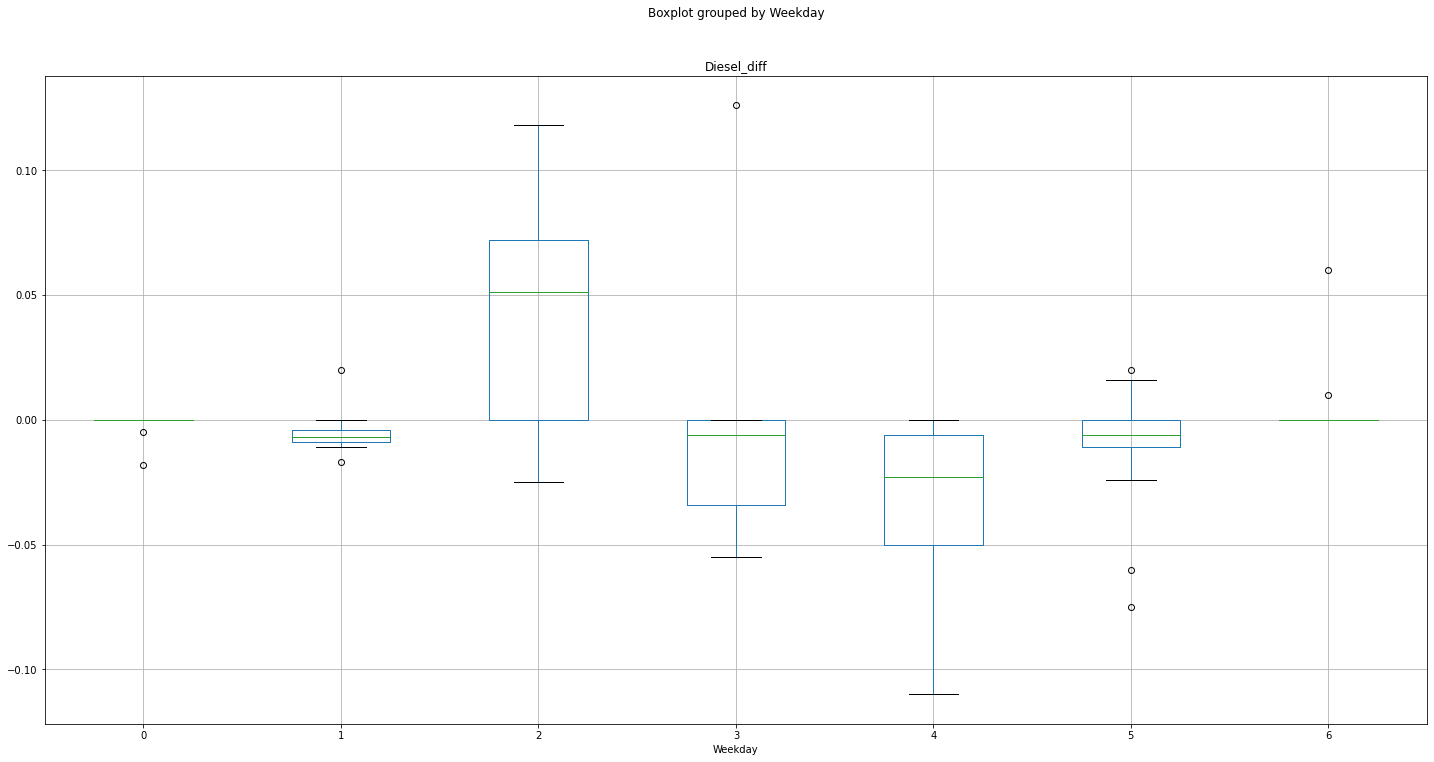

In [ ]:
boxplot = station_df_singleday.boxplot(column='Diesel_diff', by='Weekday', figsize=(24,12))